In [1]:
# import all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load csv dataset
df = pd.read_csv('heart_2022_with_nans.csv')

In [3]:
# display first 5 data
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
# display last 5 data
df.tail()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
445131,Virgin Islands,Male,Very good,0.0,1.0,NaN,Yes,5.0,None of them,No,...,1.68,63.50,22.60,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


In [5]:
# shape of the dataframe (rows, columns)
df.shape

(445132, 40)

In [6]:
# size of the dataframe
df.size

17805280

In [7]:
# list of columns
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [8]:
# apply lowercase to columns
df.columns = df.columns.str.lower()

In [9]:
# number of states
len(df['state'].value_counts())

54

# Pre-Processing
## Data Sampling

In [10]:
# Group by the 'State' column
grouped = df.groupby('state')

# Define the number of rows to sample from each group
num_rows_per_group = 50000 // len(grouped)

# Sample from each group and concatenate the results
sampled_df = grouped.apply(lambda x: x.sample(n=num_rows_per_group, random_state=1)).reset_index(drop=True)

# If the total rows are more than 50000 due to rounding, randomly select 50000 rows from the resulting dataframe
if len(sampled_df) > 50000:
    sampled_df = sampled_df.sample(n=50000, random_state=1)

# Display the resulting dataframe
sample_df = pd.DataFrame(sampled_df)

In [11]:
# (rows, columns) of sampled data
sample_df.shape

(49950, 40)

## Column Sampling

In [12]:
columns = ['state', 'sex', 'generalhealth', 'physicalactivities', 'sleephours', 'hadstroke','hadheartattack', 'hadasthma', 'hadkidneydisease', 'haddiabetes', 'smokerstatus' , 'agecategory', 'heightinmeters', 'weightinkilograms', 'bmi', 'alcoholdrinkers']
df1 = pd.DataFrame(sample_df, columns=columns)

In [13]:
# count of sample data for each state
pd.DataFrame(df1['state'].value_counts()).T

state,Alabama,Puerto Rico,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,...,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Wyoming
count,925,925,925,925,925,925,925,925,925,925,...,925,925,925,925,925,925,925,925,925,925


In [14]:
# count of original data for each state
pd.DataFrame(df['state'].value_counts()).T

state,Washington,New York,Minnesota,Ohio,Maryland,Texas,Florida,Wisconsin,Kansas,Massachusetts,...,Mississippi,North Dakota,Wyoming,Illinois,Kentucky,Delaware,District of Columbia,Nevada,Guam,Virgin Islands
count,26152,17800,16821,16487,16418,14245,13393,11276,11247,11029,...,4239,4153,4142,4056,4023,3987,3237,3188,2266,1531


In [15]:
# datatype of columns
df1.dtypes

state                  object
sex                    object
generalhealth          object
physicalactivities     object
sleephours            float64
hadstroke              object
hadheartattack         object
hadasthma              object
hadkidneydisease       object
haddiabetes            object
smokerstatus           object
agecategory            object
heightinmeters        float64
weightinkilograms     float64
bmi                   float64
alcoholdrinkers        object
dtype: object

In [16]:
# detailed information of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49950 entries, 0 to 49949
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               49950 non-null  object 
 1   sex                 49950 non-null  object 
 2   generalhealth       49797 non-null  object 
 3   physicalactivities  49839 non-null  object 
 4   sleephours          49273 non-null  float64
 5   hadstroke           49771 non-null  object 
 6   hadheartattack      49589 non-null  object 
 7   hadasthma           49754 non-null  object 
 8   hadkidneydisease    49756 non-null  object 
 9   haddiabetes         49814 non-null  object 
 10  smokerstatus        46254 non-null  object 
 11  agecategory         48981 non-null  object 
 12  heightinmeters      47028 non-null  float64
 13  weightinkilograms   45655 non-null  float64
 14  bmi                 44916 non-null  float64
 15  alcoholdrinkers     45033 non-null  object 
dtypes: f

# statistical description of data

In [17]:
df1.describe()

,sleephours,heightinmeters,weightinkilograms,bmi
count,49273.000000,47028.000000,45655.000000,44916.000000
mean,7.015546,1.701048,83.069989,28.600993
std,1.522962,0.107165,21.571516,6.624310
min,1.000000,0.910000,22.680000,12.060000
25%,6.000000,1.630000,68.040000,24.130000
50%,7.000000,1.700000,80.290000,27.440000
75%,8.000000,1.780000,95.250000,31.870000
max,24.000000,2.260000,290.300000,93.880000


In [18]:
df1.head()

,state,sex,generalhealth,physicalactivities,sleephours,hadstroke,hadheartattack,hadasthma,hadkidneydisease,haddiabetes,smokerstatus,agecategory,heightinmeters,weightinkilograms,bmi,alcoholdrinkers
0,Alabama,Female,Very good,Yes,5.0,No,No,No,No,No,Never smoked,Age 25 to 29,1.57,81.65,32.92,Yes
1,Alabama,Male,Very good,Yes,7.0,No,No,No,No,No,Never smoked,Age 18 to 24,1.88,102.06,28.89,Yes
2,Alabama,Female,Excellent,Yes,5.0,No,No,No,No,No,Former smoker,Age 35 to 39,1.57,56.70,22.86,Yes
3,Alabama,Female,Excellent,Yes,8.0,No,No,No,No,No,Never smoked,Age 55 to 59,1.75,76.66,24.96,No
4,Alabama,Female,Good,Yes,7.0,No,No,No,No,No,Never smoked,Age 65 to 69,1.63,69.85,26.43,No


In [19]:
# replace age in values to ''
df1['agecategory'] = df1['agecategory'].str.replace('Age', '')

In [20]:
df1.head()

,state,sex,generalhealth,physicalactivities,sleephours,hadstroke,hadheartattack,hadasthma,hadkidneydisease,haddiabetes,smokerstatus,agecategory,heightinmeters,weightinkilograms,bmi,alcoholdrinkers
0,Alabama,Female,Very good,Yes,5.0,No,No,No,No,No,Never smoked,25 to 29,1.57,81.65,32.92,Yes
1,Alabama,Male,Very good,Yes,7.0,No,No,No,No,No,Never smoked,18 to 24,1.88,102.06,28.89,Yes
2,Alabama,Female,Excellent,Yes,5.0,No,No,No,No,No,Former smoker,35 to 39,1.57,56.70,22.86,Yes
3,Alabama,Female,Excellent,Yes,8.0,No,No,No,No,No,Never smoked,55 to 59,1.75,76.66,24.96,No
4,Alabama,Female,Good,Yes,7.0,No,No,No,No,No,Never smoked,65 to 69,1.63,69.85,26.43,No


In [21]:
# category values of sex
df1.sex.value_counts()

sex
Female    26768
Male      23182
Name: count, dtype: int64

In [22]:
# category of generalhealth
df1.generalhealth.value_counts()

generalhealth
Good         16350
Very good    16187
Excellent     7963
Fair          7004
Poor          2293
Name: count, dtype: int64

In [23]:
# category of physicalactivities
df1.physicalactivities.value_counts()

physicalactivities
Yes    37575
No     12264
Name: count, dtype: int64

In [24]:
# category of stroke
df1.hadstroke.value_counts()

hadstroke
No     47462
Yes     2309
Name: count, dtype: int64

In [25]:
# category of heartattack
df1.hadheartattack.value_counts()

hadheartattack
No     46739
Yes     2850
Name: count, dtype: int64

In [26]:
# category of hadasthma
df1.hadasthma.value_counts()

hadasthma
No     42365
Yes     7389
Name: count, dtype: int64

In [27]:
# category of hadkidneydisease
df1.hadkidneydisease.value_counts()

hadkidneydisease
No     47408
Yes     2348
Name: count, dtype: int64

In [28]:
# category of haddiabetes
df1.haddiabetes.value_counts()

haddiabetes
No                                         41119
Yes                                         7050
No, pre-diabetes or borderline diabetes     1199
Yes, but only during pregnancy (female)      446
Name: count, dtype: int64

In [29]:
diabetes = {
    'No, pre-diabetes or borderline diabetes': 'borderline_no',
    'Yes, but only during pregnancy (female)': 'pregnancy_yes'
}
df1.haddiabetes = df1['haddiabetes'].replace(diabetes)

In [30]:
df1.haddiabetes.value_counts()

haddiabetes
No               41119
Yes               7050
borderline_no     1199
pregnancy_yes      446
Name: count, dtype: int64

In [31]:
# category of smokerstatus
df1.smokerstatus.value_counts()

smokerstatus
Never smoked                             27804
Former smoker                            12640
Current smoker - now smokes every day     4220
Current smoker - now smokes some days     1590
Name: count, dtype: int64

In [32]:
# replace smokerstatus value as required
smoker = {
    'Never smoked': 'Never',
    'Former smoker': 'Former',
    'Current smoker - now smokes every day': 'Regular',
    'Current smoker - now smokes some days': 'Irregular'
}

df1.smokerstatus = df1['smokerstatus'].replace(smoker)

In [33]:
df1.smokerstatus.value_counts()

smokerstatus
Never        27804
Former       12640
Regular       4220
Irregular     1590
Name: count, dtype: int64

In [34]:
# category of agecategory
df1.agecategory.value_counts()

agecategory
65 to 69       5356
60 to 64       4883
70 to 74       4856
80 or older    4135
55 to 59       4030
50 to 54       3799
75 to 79       3694
40 to 44       3368
45 to 49       3267
35 to 39       3192
18 to 24       3052
30 to 34       2869
25 to 29       2480
Name: count, dtype: int64

In [35]:
df1.head()

,state,sex,generalhealth,physicalactivities,sleephours,hadstroke,hadheartattack,hadasthma,hadkidneydisease,haddiabetes,smokerstatus,agecategory,heightinmeters,weightinkilograms,bmi,alcoholdrinkers
0,Alabama,Female,Very good,Yes,5.0,No,No,No,No,No,Never,25 to 29,1.57,81.65,32.92,Yes
1,Alabama,Male,Very good,Yes,7.0,No,No,No,No,No,Never,18 to 24,1.88,102.06,28.89,Yes
2,Alabama,Female,Excellent,Yes,5.0,No,No,No,No,No,Former,35 to 39,1.57,56.70,22.86,Yes
3,Alabama,Female,Excellent,Yes,8.0,No,No,No,No,No,Never,55 to 59,1.75,76.66,24.96,No
4,Alabama,Female,Good,Yes,7.0,No,No,No,No,No,Never,65 to 69,1.63,69.85,26.43,No


In [36]:
# change string datatypes values to lowercase
df1[df1.select_dtypes('object').columns] = df1.select_dtypes('object').apply(lambda x: x.str.lower())

In [37]:
df1.head()

,state,sex,generalhealth,physicalactivities,sleephours,hadstroke,hadheartattack,hadasthma,hadkidneydisease,haddiabetes,smokerstatus,agecategory,heightinmeters,weightinkilograms,bmi,alcoholdrinkers
0,alabama,female,very good,yes,5.0,no,no,no,no,no,never,25 to 29,1.57,81.65,32.92,yes
1,alabama,male,very good,yes,7.0,no,no,no,no,no,never,18 to 24,1.88,102.06,28.89,yes
2,alabama,female,excellent,yes,5.0,no,no,no,no,no,former,35 to 39,1.57,56.70,22.86,yes
3,alabama,female,excellent,yes,8.0,no,no,no,no,no,never,55 to 59,1.75,76.66,24.96,no
4,alabama,female,good,yes,7.0,no,no,no,no,no,never,65 to 69,1.63,69.85,26.43,no


# Handling Missing Values

In [38]:
# count null values 
pd.concat([df1.isna().sum(), df1.dtypes], axis=1)

,0,1
state,0,object
sex,0,object
generalhealth,153,object
physicalactivities,111,object
sleephours,677,float64
hadstroke,179,object
hadheartattack,361,object
hadasthma,196,object
hadkidneydisease,194,object
haddiabetes,136,object


In [39]:
# fill null value of categorical value with the mode of the columns
df1[df1.select_dtypes('object').columns] = df1.select_dtypes('object').apply(lambda x: x.fillna(x.mode()[0]))

In [40]:
# fill numerical null values with median of the columns
df1[df1.select_dtypes('float64').columns] = df1.select_dtypes('float64').apply(lambda x: x.fillna(x.median()))

In [41]:
# check the null values in the dataframe
df1.isnull().sum()

state                 0
sex                   0
generalhealth         0
physicalactivities    0
sleephours            0
hadstroke             0
hadheartattack        0
hadasthma             0
hadkidneydisease      0
haddiabetes           0
smokerstatus          0
agecategory           0
heightinmeters        0
weightinkilograms     0
bmi                   0
alcoholdrinkers       0
dtype: int64

# Visualizations

### 1. Which State has most heart attacks?

In [42]:
# Not having heart attack counts
len(df1[df1['hadheartattack'] == 'no'])

47100

In [43]:
# Having heart attack counts
len(df1[df1['hadheartattack'] == 'yes'])

2850

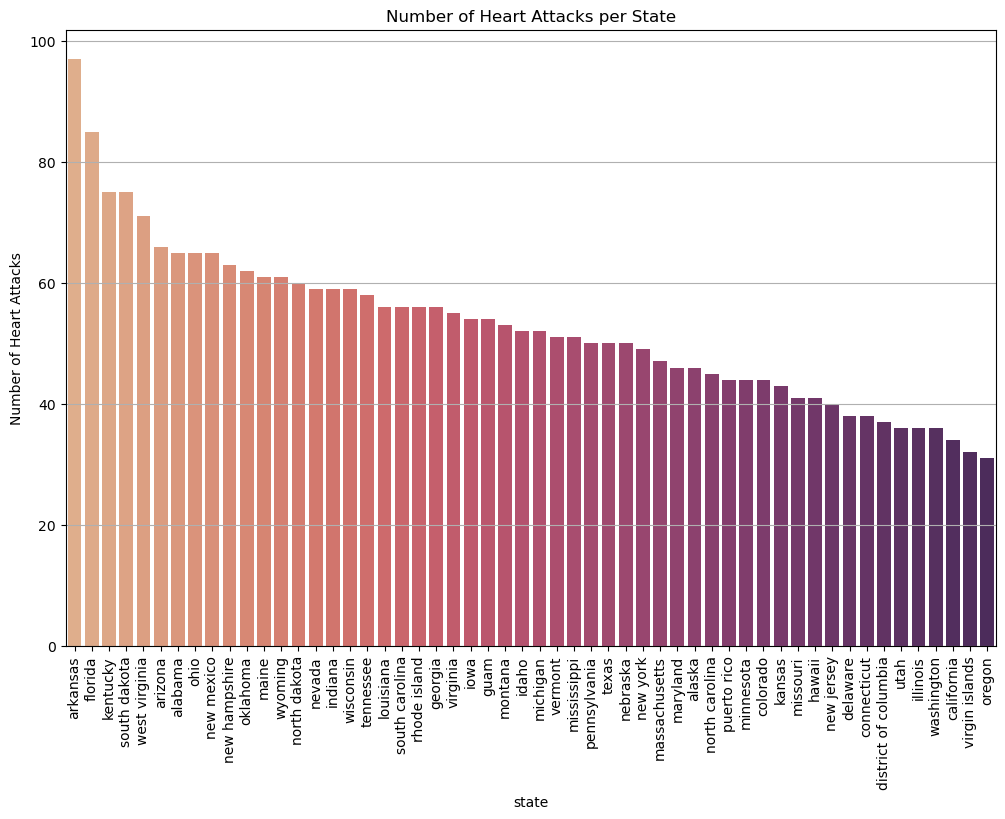

In [44]:
# filter data who had a heart attack
heart_attack_data = df1[df1['hadheartattack'] == 'yes']

# count the number of heartattack by state
state_heart_attack_counts = heart_attack_data['state'].value_counts()

# plotting the heart attack data by state
plt.figure(figsize=(12,8))
sns.barplot(x=state_heart_attack_counts.index, y=state_heart_attack_counts.values, palette='flare')
plt.xticks(rotation=90)
plt.title('Number of Heart Attacks per State')
plt.xlabel('state')
plt.ylabel('Number of Heart Attacks')
plt.grid(axis='y')
plt.show()

### 2. Number of Males and Females that had heartattack based on State

In [45]:
# Not having heart attack counts
len(df1[df1['hadheartattack'] == 'no'])

47100

In [46]:
# Having heart attack counts
len(df1[df1['hadheartattack'] == 'yes'])

2850

In [47]:
# filter data who had a heart attack
heart_attack_data = df1[df1['hadheartattack'] == 'yes']

# first 5 number of heart attacks per state grouped by sex and reset index to turn state into a column
heart_attack_data.groupby(['state', 'sex']).size().unstack().reset_index().head(5)

sex,state,female,male
0,alabama,32,33
1,alaska,16,30
2,arizona,31,35
3,arkansas,38,59
4,california,17,17


In [48]:
# number of heart attacks per state grouped by sex and reset index to turn state into a column
grouped_data = heart_attack_data.groupby(['state', 'sex']).size().unstack().reset_index()

# first 5 long-formmat with female data first
grouped_data.melt(id_vars='state', value_vars=['female', 'male'], var_name='sex', value_name='count').head()

,state,sex,count
0,alabama,female,32
1,alaska,female,16
2,arizona,female,31
3,arkansas,female,38
4,california,female,17


In [49]:
# first 5 long-formmat with male data first
grouped_data.melt(id_vars='state', value_vars=['male', 'female'], var_name='sex', value_name='count').head()

,state,sex,count
0,alabama,male,33
1,alaska,male,30
2,arizona,male,35
3,arkansas,male,59
4,california,male,17


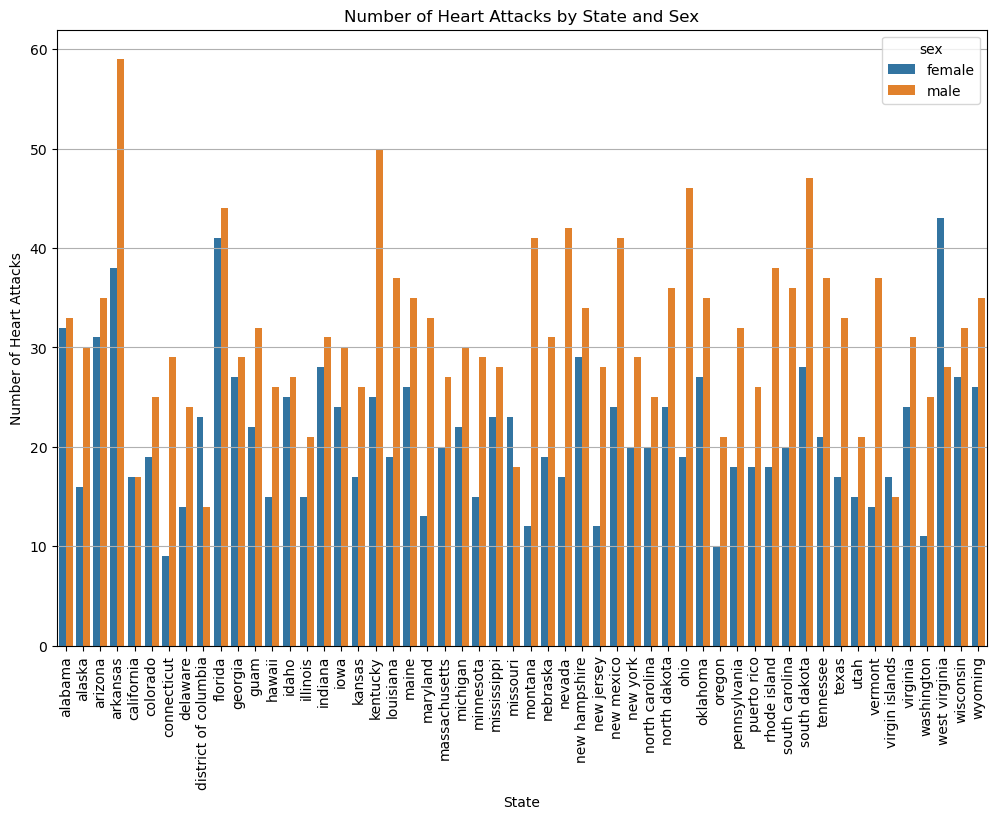

In [50]:
# filter data who had a heart attack
heart_attack_data = df1[df1['hadheartattack'] == 'yes']

# number of heart attacks per state grouped by sex and reset index to turn state into a column
grouped_data = heart_attack_data.groupby(['state', 'sex']).size().unstack().reset_index()

# melt converts dataframe into long-formmat for data anlysis and manipulation
melted_group_data = grouped_data.melt(id_vars='state', value_vars=['female', 'male'], var_name='sex', value_name='count')

# plot the heart attack data per state and grouped by sex
plt.figure(figsize=(12,8))
sns.barplot(data=melted_group_data, x='state', y='count', hue='sex')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.title('Number of Heart Attacks by State and Sex')
plt.xlabel('State')
plt.ylabel('Number of Heart Attacks')
plt.show()

### 3. Relationship between heartattack and sleeping hours, depending upon sex

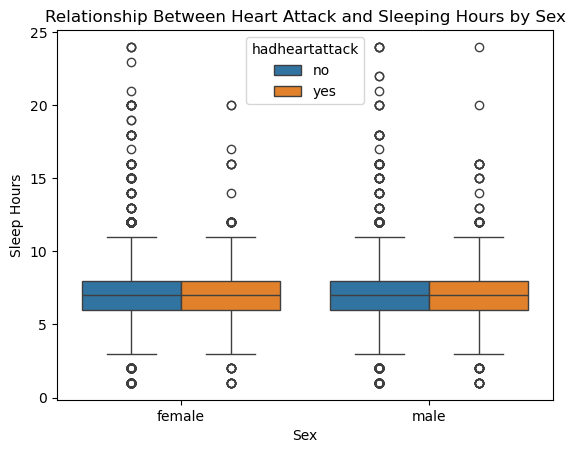

In [51]:
sns.boxplot(data=df1, x='sex', y='sleephours', hue='hadheartattack')
plt.title('Relationship Between Heart Attack and Sleeping Hours by Sex')
plt.xlabel('Sex')
plt.ylabel('Sleep Hours')
plt.show()

### 4. Relationship between heartattack and smoking habit, depending upon gender

In [52]:
# Not having heart attack counts
len(df1[df1['hadheartattack'] == 'no'])

47100

In [53]:
# Having heart attack counts
len(df1[df1['hadheartattack'] == 'yes'])

2850

In [54]:
# group by of heart attack with smoking habit by sex 
df1.groupby(['hadheartattack', 'smokerstatus', 'sex']).size()

hadheartattack  smokerstatus  sex   
no              former        female     5715
                              male       5804
                irregular     female      682
                              male        799
                never         female    17246
                              male      13022
                regular       female     1976
                              male       1856
yes             former        female      391
                              male        730
                irregular     female       51
                              male         58
                never         female      570
                              male        662
                regular       female      137
                              male        251
dtype: int64

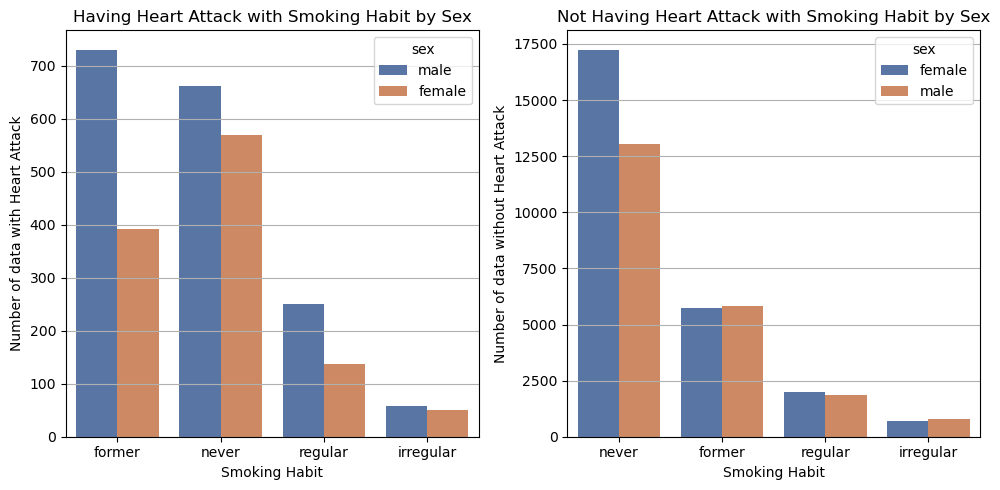

In [55]:
# filter data with heart attack
with_heart_attack_data = df1[df1['hadheartattack'] == 'yes']

# filter data without heart attack
without_heart_attack_data = df1[df1['hadheartattack'] == 'no']

# subplot with 1 row and 2 columns with figure size 10, 5.
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# plot the data of having heart attack with smoking habit by sex
sns.countplot(data=with_heart_attack_data, x='smokerstatus', hue='sex', ax=axes[0], palette='deep')
axes[0].set_title('Having Heart Attack with Smoking Habit by Sex')
axes[0].set_xlabel('Smoking Habit')
axes[0].set_ylabel('Number of data with Heart Attack')
axes[0].grid(axis='y')

# plot the data of not having heart attack with smoking habit by sex
sns.countplot(data=without_heart_attack_data, x='smokerstatus', hue='sex', ax=axes[1], palette='deep')
axes[1].set_title('Not Having Heart Attack with Smoking Habit by Sex')
axes[1].set_xlabel('Smoking Habit')
axes[1].set_ylabel('Number of data without Heart Attack')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [56]:
# # filter data who had a heart attack
# heart_attack_data = df1[df1['hadheartattack'] == 'yes']

# # plot the number of heart attack and smoker status by sex
# sns.countplot(data=heart_attack_data, x='smokerstatus', hue='sex', palette='coolwarm')
# plt.title('Relationship Between Heart Attack and Smoking Habit by Sex')
# plt.xlabel('Smoking Habit')
# plt.ylabel('Number of Heart Attacks')
# plt.grid(axis='y')
# plt.show()

### 5. Relationship between heartattack and drinking habit, depending upon gender

In [57]:
# Not having heart attack counts
len(df1[df1['hadheartattack'] == 'no'])

47100

In [58]:
# Having heart attack counts
len(df1[df1['hadheartattack'] == 'yes'])

2850

In [59]:
# grouped of data who had heart attack with alcohol habit by sex 
df1.groupby(['hadheartattack', 'alcoholdrinkers', 'sex']).size()

hadheartattack  alcoholdrinkers  sex   
no              no               female    12252
                                 male       7975
                yes              female    13367
                                 male      13506
yes             no               female      779
                                 male        856
                yes              female      370
                                 male        845
dtype: int64

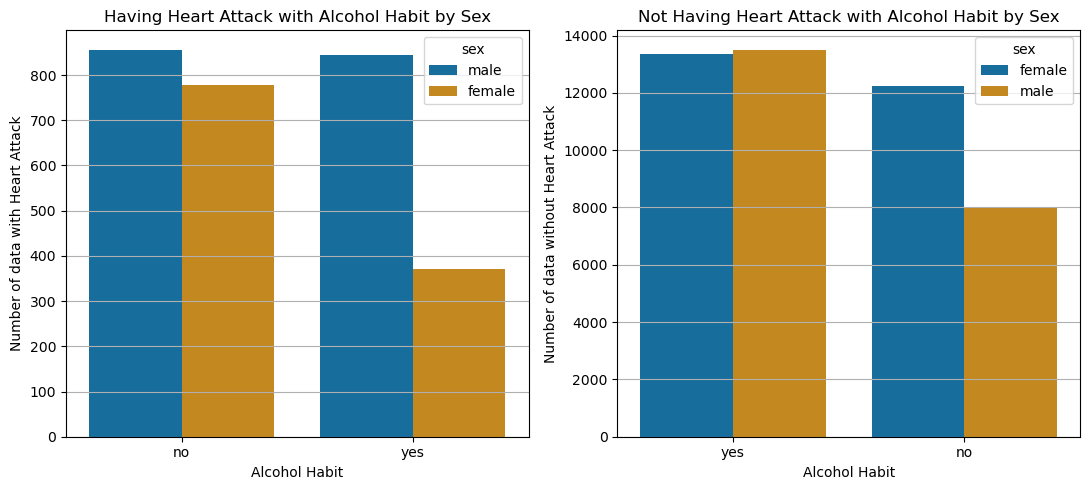

In [60]:
# filter data with heart attack
with_heart_attack_data = df1[df1['hadheartattack'] == 'yes']

# filter data without heart attack
without_heart_attack_data = df1[df1['hadheartattack'] == 'no']

# subplot with 1 row and 2 columns with figure size 11, 5.
fig, axes = plt.subplots(1, 2, figsize=(11,5))

# plot the data of having heart attack with alcohol drinking habit by sex
sns.countplot(data=with_heart_attack_data, x='alcoholdrinkers', hue='sex', ax=axes[0], palette='colorblind')
axes[0].set_title('Having Heart Attack with Alcohol Habit by Sex')
axes[0].set_xlabel('Alcohol Habit')
axes[0].set_ylabel('Number of data with Heart Attack')
axes[0].grid(axis='y')

# plot the data of not having heart attack with alcohol drinking habit by sex
sns.countplot(data=without_heart_attack_data, x='alcoholdrinkers', hue='sex', ax=axes[1], palette='colorblind')
axes[1].set_title('Not Having Heart Attack with Alcohol Habit by Sex')
axes[1].set_xlabel('Alcohol Habit')
axes[1].set_ylabel('Number of data without Heart Attack')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

### 6. Does age affects the probability for heartattack ?

In [61]:
# Total data of heart attack patient
len(df1[df1['hadheartattack'] == 'yes'])

2850

In [62]:
# grouped of data who had heart attack by age category
df1[df1['hadheartattack'] == 'yes'].groupby(['hadheartattack', 'agecategory']).size()

hadheartattack  agecategory
yes             18 to 24        16
                25 to 29        11
                30 to 34        23
                35 to 39        41
                40 to 44        55
                45 to 49        79
                50 to 54       150
                55 to 59       221
                60 to 64       332
                65 to 69       482
                70 to 74       437
                75 to 79       428
                80 or older    575
dtype: int64

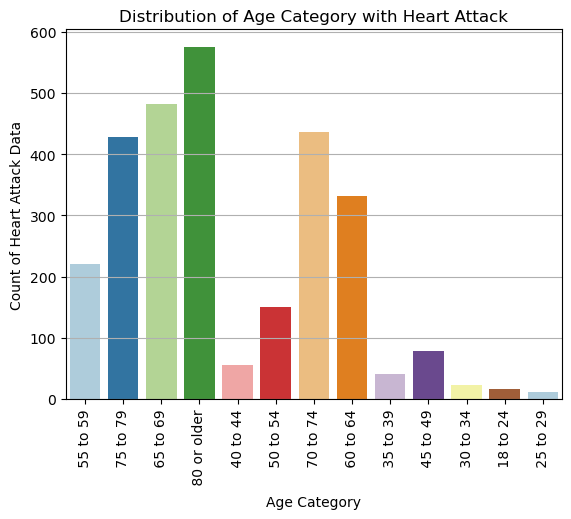

In [63]:
# filter data with heart attack
with_heart_attack = df1[df1['hadheartattack'] == 'yes']

# count plot for age category and heart attack
sns.countplot(data=with_heart_attack, x='agecategory', palette='Paired')
plt.title('Distribution of Age Category with Heart Attack')
plt.xlabel('Age Category')
plt.ylabel('Count of Heart Attack Data')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### 7. Does diabeties plays any role for heartattack ?

In [64]:
# Total data of heart attack patient
len(df1[df1['hadheartattack'] == 'yes' ])

2850

In [65]:
# grouped of data who had heart attack vs diabetes
df1[df1['hadheartattack'] == 'yes' ].groupby(['hadheartattack', 'haddiabetes']).size()

hadheartattack  haddiabetes  
yes             borderline_no      92
                no               1744
                pregnancy_yes       9
                yes              1005
dtype: int64

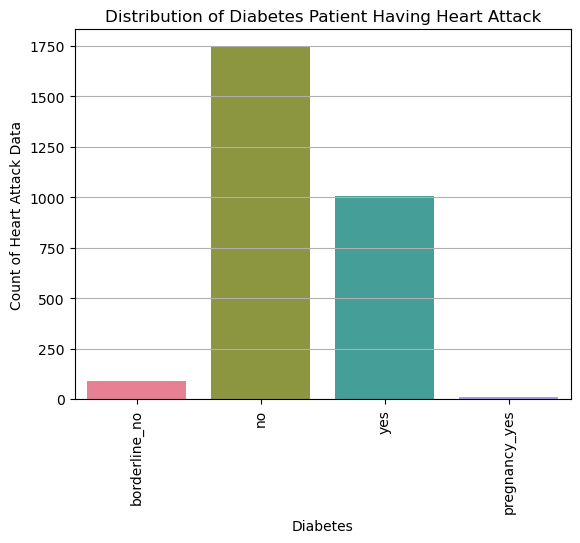

In [66]:
# filter data with heart attack
with_heart_attack = df1[df1['hadheartattack'] == 'yes']

# count plot for heart attack and diabetes
sns.countplot(data=with_heart_attack, x='haddiabetes', palette='husl')
plt.title('Distribution of Diabetes Patient Having Heart Attack')
plt.xlabel('Diabetes')
plt.ylabel('Count of Heart Attack Data')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### 8. Relationship between stroke and heartattack

In [100]:
# grouped of data by stroke and heart attack
df1.groupby(['hadstroke', 'hadheartattack']).size()

hadstroke  hadheartattack
no         no                45363
           yes                2278
yes        no                 1737
           yes                 572
dtype: int64

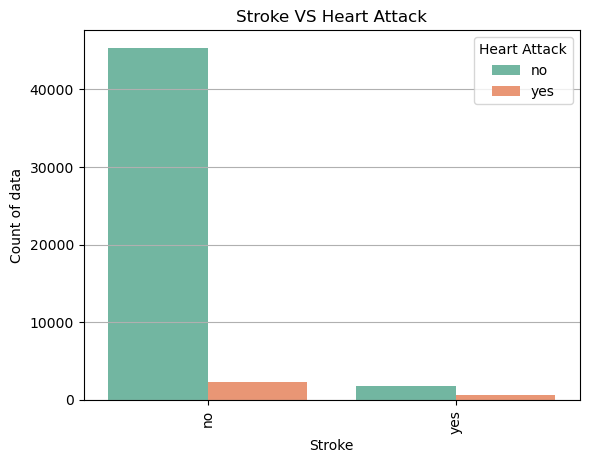

In [67]:
# count plot for heart attack and stroke
sns.countplot(data=df1, x='hadstroke', hue='hadheartattack', palette='Set2')
plt.title('Stroke VS Heart Attack')
plt.xlabel('Stroke')
plt.ylabel('Count of data')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(title='Heart Attack')
plt.show()

### 9. Does person who does physical activities has heartattack?

In [68]:
# grouped of data who had heart attack by physicalactivity
df1.groupby(['physicalactivities', 'hadheartattack']).size()

physicalactivities  hadheartattack
no                  no                11113
                    yes                1151
yes                 no                35987
                    yes                1699
dtype: int64

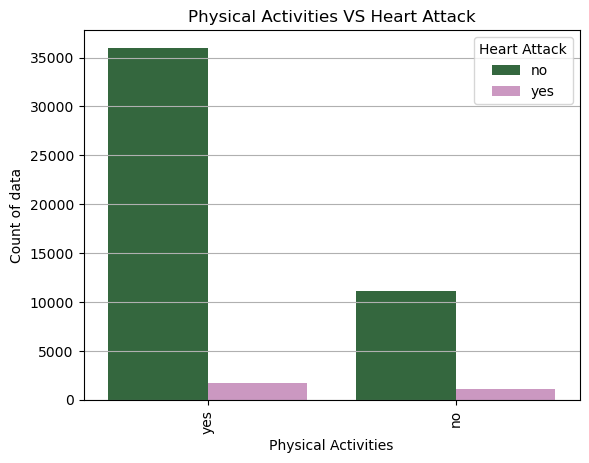

In [69]:
# count plot for heart attack and physical activites
sns.countplot(data=df1, x='physicalactivities', hue='hadheartattack', palette='cubehelix')
plt.title('Physical Activities VS Heart Attack')
plt.xlabel('Physical Activities')
plt.ylabel('Count of data')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(title='Heart Attack')
plt.show()

### 10. What is the relationship between BMI and the likelihood of having heart attack, and how does this vary by gender?

[]

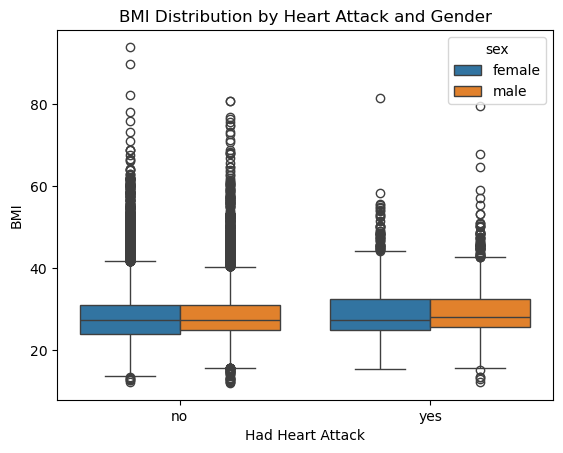

In [70]:
sns.boxplot(data=df1, x='hadheartattack', y='bmi', hue='sex')
plt.title('BMI Distribution by Heart Attack and Gender')
plt.xlabel('Had Heart Attack')
plt.ylabel('BMI')
plt.plot()

### 11. Is there a correlation between general health status and the incidence of heart attacks? Does this relationship differ between males and females?

In [71]:
# number of male records
len(df1[df1['sex'] == 'male'])

23182

In [72]:
# number of female records
len(df1[df1['sex'] == 'female'])

26768

In [73]:
# group by the 'generalhealth', 'sex' and 'hadheartattack' columns with size
df1.groupby(['generalhealth', 'sex', 'hadheartattack']).size()

generalhealth  sex     hadheartattack
excellent      female  no                3850
                       yes                 35
               male    no                3995
                       yes                 83
fair           female  no                3520
                       yes                391
               male    no                2616
                       yes                477
good           female  no                8645
                       yes                335
               male    no                6943
                       yes                580
poor           female  no                1013
                       yes                222
               male    no                 777
                       yes                281
very good      female  no                8591
                       yes                166
               male    no                7150
                       yes                280
dtype: int64

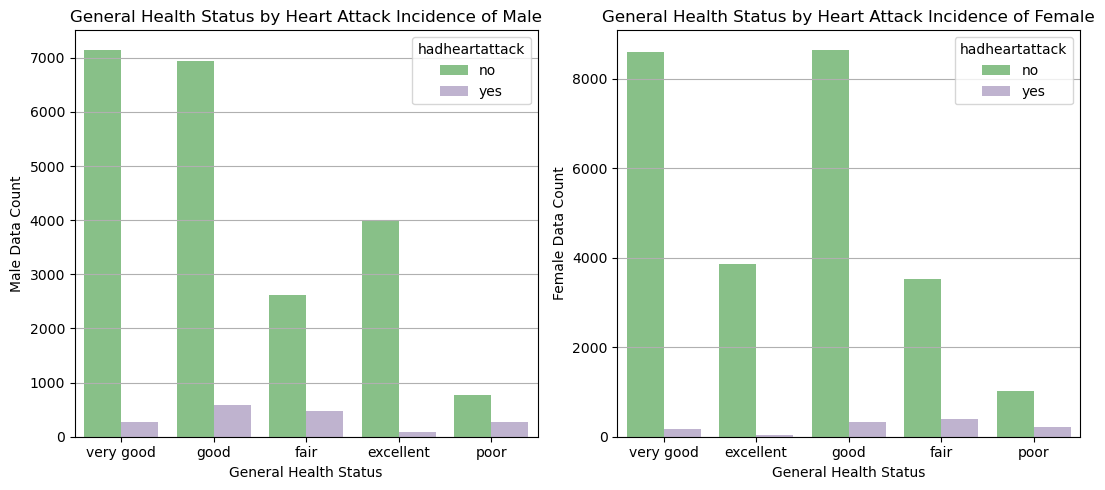

In [74]:
# filter data with gender male
gender_male = df1[df1['sex'] == 'male']

# filter data with gender female
gender_female = df1[df1['sex'] == 'female']

# subplot with 1 row and 2 columns with figure size 11, 5.
fig, axes = plt.subplots(1, 2, figsize=(11,5))

# plot the data of male with general health status by heart attack incidence
sns.countplot(data=gender_male, x='generalhealth', hue='hadheartattack', ax=axes[0], palette='Accent')
axes[0].set_title('General Health Status by Heart Attack Incidence of Male')
axes[0].set_xlabel('General Health Status')
axes[0].set_ylabel('Male Data Count')
axes[0].grid(axis='y')

# plot the data of female with general health status by heart attack incidence
sns.countplot(data=gender_female, x='generalhealth', hue='hadheartattack', ax=axes[1], palette='Accent')
axes[1].set_title('General Health Status by Heart Attack Incidence of Female')
axes[1].set_xlabel('General Health Status')
axes[1].set_ylabel('Female Data Count')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

### 12. Do individuals with a history of kidney disease have a higher probability of experincing a heart attack? How does this relationship change across different age categories?

In [75]:
# count of indiviual with kidney diesase and heart attack
df1[df1['hadkidneydisease'] == 'yes'].groupby(['hadkidneydisease', 'hadheartattack']).size()

hadkidneydisease  hadheartattack
yes               no                1915
                  yes                433
dtype: int64

[]

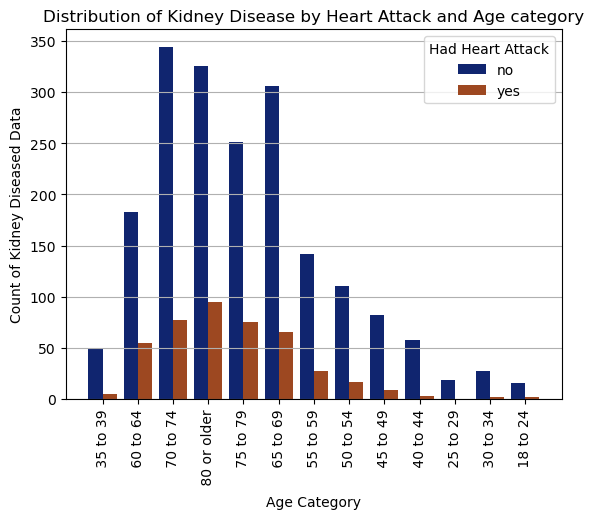

In [76]:
# filter data with kidney disease
kidney_dieased_patient = df1[df1['hadkidneydisease'] == 'yes' ]

# plot the countplot
sns.countplot(data=kidney_dieased_patient, x='agecategory', hue='hadheartattack', palette='dark')
plt.title('Distribution of Kidney Disease by Heart Attack and Age category')
plt.xlabel('Age Category')
plt.ylabel('Count of Kidney Diseased Data')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(title='Had Heart Attack')
plt.plot()

# Save final dataframe
df1.to_csv('df1.csv', index=False)

# Pre-Processing with PySpark

### install pyspark
!pip install pyspark

In [77]:
# setup PySpark Session and setup all required dependencies
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lower, isnull, sum, count, when, expr
from pyspark.sql.types import StringType, DoubleType

# create pyspark session
spark = SparkSession.builder.appName('HeartDataProcessing').getOrCreate()

In [78]:
spark

In [79]:
# load the CSV file
df_spark = spark.read.csv('heart_2022_with_nans.csv', header=True, inferSchema=True)

In [80]:
# show first 5 rows
df_spark.head(5)

[Row(State='Alabama', Sex='Female', GeneralHealth='Very good', PhysicalHealthDays=0.0, MentalHealthDays=0.0, LastCheckupTime='Within past year (anytime less than 12 months ago)', PhysicalActivities='No', SleepHours=8.0, RemovedTeeth=None, HadHeartAttack='No', HadAngina='No', HadStroke='No', HadAsthma='No', HadSkinCancer='No', HadCOPD='No', HadDepressiveDisorder='No', HadKidneyDisease='No', HadArthritis='No', HadDiabetes='Yes', DeafOrHardOfHearing='No', BlindOrVisionDifficulty='No', DifficultyConcentrating='No', DifficultyWalking='No', DifficultyDressingBathing='No', DifficultyErrands='No', SmokerStatus='Never smoked', ECigaretteUsage='Not at all (right now)', ChestScan='No', RaceEthnicityCategory='White only, Non-Hispanic', AgeCategory='Age 80 or older', HeightInMeters=None, WeightInKilograms=None, BMI=None, AlcoholDrinkers='No', HIVTesting='No', FluVaxLast12='Yes', PneumoVaxEver='No', TetanusLast10Tdap='Yes, received tetanus shot but not sure what type', HighRiskLastYear='No', CovidPo

In [81]:
# last 5 rows
df_spark.tail(5)

[Row(State='Virgin Islands', Sex='Female', GeneralHealth='Good', PhysicalHealthDays=0.0, MentalHealthDays=3.0, LastCheckupTime='Within past 2 years (1 year but less than 2 years ago)', PhysicalActivities='Yes', SleepHours=6.0, RemovedTeeth='None of them', HadHeartAttack='No', HadAngina='No', HadStroke='No', HadAsthma='Yes', HadSkinCancer='No', HadCOPD='No', HadDepressiveDisorder='Yes', HadKidneyDisease='No', HadArthritis='No', HadDiabetes='No', DeafOrHardOfHearing='No', BlindOrVisionDifficulty='No', DifficultyConcentrating='No', DifficultyWalking='No', DifficultyDressingBathing='No', DifficultyErrands='No', SmokerStatus='Never smoked', ECigaretteUsage='Never used e-cigarettes in my entire life', ChestScan='Yes', RaceEthnicityCategory='Black only, Non-Hispanic', AgeCategory='Age 18 to 24', HeightInMeters=1.65, WeightInKilograms=69.85, BMI=25.63, AlcoholDrinkers=None, HIVTesting='Yes', FluVaxLast12='No', PneumoVaxEver='No', TetanusLast10Tdap='No, did not receive any tetanus shot in the p

In [82]:
# columns in dataframe
df_spark.columns

['State',
 'Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'MentalHealthDays',
 'LastCheckupTime',
 'PhysicalActivities',
 'SleepHours',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [83]:
# shape of df_spark (rows, columns)
print(f'Shape of dataframe: ({df_spark.count()}, {len(df_spark.columns)})')

Shape of dataframe: (445132, 40)


In [84]:
# print the schema of the dataframe
df_spark.printSchema()

root
 |-- State: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- GeneralHealth: string (nullable = true)
 |-- PhysicalHealthDays: double (nullable = true)
 |-- MentalHealthDays: double (nullable = true)
 |-- LastCheckupTime: string (nullable = true)
 |-- PhysicalActivities: string (nullable = true)
 |-- SleepHours: double (nullable = true)
 |-- RemovedTeeth: string (nullable = true)
 |-- HadHeartAttack: string (nullable = true)
 |-- HadAngina: string (nullable = true)
 |-- HadStroke: string (nullable = true)
 |-- HadAsthma: string (nullable = true)
 |-- HadSkinCancer: string (nullable = true)
 |-- HadCOPD: string (nullable = true)
 |-- HadDepressiveDisorder: string (nullable = true)
 |-- HadKidneyDisease: string (nullable = true)
 |-- HadArthritis: string (nullable = true)
 |-- HadDiabetes: string (nullable = true)
 |-- DeafOrHardOfHearing: string (nullable = true)
 |-- BlindOrVisionDifficulty: string (nullable = true)
 |-- DifficultyConcentrating: string (nullable = t

In [85]:
# dataypes of dataframe
df_spark.dtypes

[('State', 'string'),
 ('Sex', 'string'),
 ('GeneralHealth', 'string'),
 ('PhysicalHealthDays', 'double'),
 ('MentalHealthDays', 'double'),
 ('LastCheckupTime', 'string'),
 ('PhysicalActivities', 'string'),
 ('SleepHours', 'double'),
 ('RemovedTeeth', 'string'),
 ('HadHeartAttack', 'string'),
 ('HadAngina', 'string'),
 ('HadStroke', 'string'),
 ('HadAsthma', 'string'),
 ('HadSkinCancer', 'string'),
 ('HadCOPD', 'string'),
 ('HadDepressiveDisorder', 'string'),
 ('HadKidneyDisease', 'string'),
 ('HadArthritis', 'string'),
 ('HadDiabetes', 'string'),
 ('DeafOrHardOfHearing', 'string'),
 ('BlindOrVisionDifficulty', 'string'),
 ('DifficultyConcentrating', 'string'),
 ('DifficultyWalking', 'string'),
 ('DifficultyDressingBathing', 'string'),
 ('DifficultyErrands', 'string'),
 ('SmokerStatus', 'string'),
 ('ECigaretteUsage', 'string'),
 ('ChestScan', 'string'),
 ('RaceEthnicityCategory', 'string'),
 ('AgeCategory', 'string'),
 ('HeightInMeters', 'double'),
 ('WeightInKilograms', 'double'),
 (

In [86]:
# number of distinct rows that have duplicates
df_spark.groupBy(df_spark.columns).count().filter(col('count') > 1).count()

145

In [87]:
# dropping duplicates based on all columns
df_spark_deduplicated = df_spark.dropDuplicates()

# number of rows after deduplication
num_rows_after_deduplication = df_spark_deduplicated.count()

# calculate the number of rows dropped
print(df_spark.count() - num_rows_after_deduplication)

157


In [88]:
# shape of df_spark (rows, columns)
print(f'Shape of dataframe: ({df_spark.count()}, {len(df_spark.columns)})')

Shape of dataframe: (445132, 40)


In [89]:
string_columns = [field.name for field in df_spark_deduplicated.schema.fields if isinstance(field.dataType, StringType)]

# convert all string columns value to lowercase
df_spark_lower = df_spark_deduplicated
for column in string_columns:
    df_spark_lower = df_spark_lower.withColumn(column, lower(col(column)))

df_spark_lower.show()

+-------+------+-------------+------------------+----------------+--------------------+------------------+----------+--------------------+--------------+---------+---------+---------+-------------+-------+---------------------+----------------+------------+-----------+-------------------+-----------------------+-----------------------+-----------------+-------------------------+-----------------+--------------------+--------------------+---------+---------------------+---------------+--------------+-----------------+-----+---------------+----------+------------+-------------+--------------------+----------------+--------+
|  State|   Sex|GeneralHealth|PhysicalHealthDays|MentalHealthDays|     LastCheckupTime|PhysicalActivities|SleepHours|        RemovedTeeth|HadHeartAttack|HadAngina|HadStroke|HadAsthma|HadSkinCancer|HadCOPD|HadDepressiveDisorder|HadKidneyDisease|HadArthritis|HadDiabetes|DeafOrHardOfHearing|BlindOrVisionDifficulty|DifficultyConcentrating|DifficultyWalking|DifficultyDress

# Handling missing values

In [90]:
# count missing values in each column
df_spark_lower.select([sum(isnull(col(c)).cast('int')).alias(c) for c in df_spark_lower.columns]).show()

+-----+---+-------------+------------------+----------------+---------------+------------------+----------+------------+--------------+---------+---------+---------+-------------+-------+---------------------+----------------+------------+-----------+-------------------+-----------------------+-----------------------+-----------------+-------------------------+-----------------+------------+---------------+---------+---------------------+-----------+--------------+-----------------+-----+---------------+----------+------------+-------------+-----------------+----------------+--------+
|State|Sex|GeneralHealth|PhysicalHealthDays|MentalHealthDays|LastCheckupTime|PhysicalActivities|SleepHours|RemovedTeeth|HadHeartAttack|HadAngina|HadStroke|HadAsthma|HadSkinCancer|HadCOPD|HadDepressiveDisorder|HadKidneyDisease|HadArthritis|HadDiabetes|DeafOrHardOfHearing|BlindOrVisionDifficulty|DifficultyConcentrating|DifficultyWalking|DifficultyDressingBathing|DifficultyErrands|SmokerStatus|ECigaretteUsag

In [91]:
# define threshold for missing data
threshold = df_spark_lower.count() * 0.7
# print(threshold)

# calculate the number of non-null values fro each column
non_null_counts = df_spark_lower.select([
    count(when(col(c).isNotNull(), col(c))).alias(c) for c in df_spark_lower.columns
])

# collect non-null counts as a dictionary
non_null_counts_dict = non_null_counts.collect()[0].asDict()
# print(non_null_counts_dict)

# determine which columns to keep
columns_to_keep = [c for c in non_null_counts_dict if non_null_counts_dict[c] > threshold]
# print(columns_to_keep)

# create a new dataframe with only the columns that meet the threshold
if columns_to_keep:
    df_spark_missing_value = df_spark_lower.select(*columns_to_keep)
    # remaining columns
    print(f'Columns with data greater than threshold:{len(df_spark_missing_value.columns)}\n {df_spark_missing_value.columns}')
else:
    print('DataFrame is Empty')

Columns with data greater than threshold:40
 ['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


In [92]:
# shape of df_spark (rows, columns)
print(f'Shape of dataframe: ({df_spark.count()}, {len(df_spark.columns)})')

Shape of dataframe: (445132, 40)


In [93]:
# since dataframe has more than 70% data. Instead of dropping the column fill the column with suitable measures
# handling missing values for string columns
string_columns = [field.name for field in df_spark_missing_value.schema.fields if isinstance(field.dataType, StringType)]

for column in string_columns:
    # calculate mode for each string column
    mode_value = df_spark_missing_value.groupBy(column).count().orderBy('count', ascending=False).first()[0]
    df_spark_missing_value = df_spark_missing_value.fillna({column: mode_value})

double_columns = [field.name for field in df_spark_missing_value.schema.fields if isinstance(field.dataType, DoubleType)]

for column in double_columns:
    # calculate median for Double type column
    median_value = df_spark_missing_value.select(expr(f'percentile_approx({column}, 0.5)').alias('median_value')).first()[0]
    df_spark_missing_value = df_spark_missing_value.fillna({column: median_value})

# count missing values in each column
df_spark_missing_value.select([sum(isnull(col(c)).cast('int')).alias(c) for c in df_spark_missing_value.columns]).show()

+-----+---+-------------+------------------+----------------+---------------+------------------+----------+------------+--------------+---------+---------+---------+-------------+-------+---------------------+----------------+------------+-----------+-------------------+-----------------------+-----------------------+-----------------+-------------------------+-----------------+------------+---------------+---------+---------------------+-----------+--------------+-----------------+---+---------------+----------+------------+-------------+-----------------+----------------+--------+
|State|Sex|GeneralHealth|PhysicalHealthDays|MentalHealthDays|LastCheckupTime|PhysicalActivities|SleepHours|RemovedTeeth|HadHeartAttack|HadAngina|HadStroke|HadAsthma|HadSkinCancer|HadCOPD|HadDepressiveDisorder|HadKidneyDisease|HadArthritis|HadDiabetes|DeafOrHardOfHearing|BlindOrVisionDifficulty|DifficultyConcentrating|DifficultyWalking|DifficultyDressingBathing|DifficultyErrands|SmokerStatus|ECigaretteUsage|

In [94]:
# Statistical summary of numerical columns
df_spark_missing_value.select('PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI').describe().show()

+-------+------------------+-----------------+------------------+-------------------+------------------+------------------+
|summary|PhysicalHealthDays| MentalHealthDays|        SleepHours|     HeightInMeters| WeightInKilograms|               BMI|
+-------+------------------+-----------------+------------------+-------------------+------------------+------------------+
|  count|            444975|           444975|            444975|             444975|            444975|            444975|
|   mean| 4.242615877296477|4.294879487611664| 7.022628237541435| 1.7025180291027509| 82.85463421542254|28.410722939487776|
| stddev| 8.609001907838458|8.325745362839383|1.4933930464434881|0.10369003279878639|20.424073476481045|  6.19548958537514|
|    min|               0.0|              0.0|               1.0|               0.91|             22.68|             12.02|
|    max|              30.0|             30.0|              24.0|               2.41|            292.57|             99.64|
+-------

In [95]:
# category values of sex
df_spark_missing_value.groupBy('Sex').count().orderBy('count').show()

+------+------+
|   Sex| count|
+------+------+
|  male|209152|
|female|235823|
+------+------+



In [96]:
# category values of GeneralHealth
df_spark_missing_value.groupBy('GeneralHealth').count().orderBy('count', ascending=False).show()

+-------------+------+
|GeneralHealth| count|
+-------------+------+
|    very good|149565|
|         good|143576|
|    excellent| 71821|
|         fair| 60272|
|         poor| 19741|
+-------------+------+



In [97]:
# category values of HadHeartAttack
df_spark_missing_value.groupBy('HadHeartAttack').count().orderBy('count', ascending=False).show()

+--------------+------+
|HadHeartAttack| count|
+--------------+------+
|            no|419867|
|           yes| 25108|
+--------------+------+



In [98]:
# category values of HadStroke
df_spark_missing_value.groupBy('HadStroke').count().orderBy('count', ascending=False).show()

+---------+------+
|HadStroke| count|
+---------+------+
|       no|425737|
|      yes| 19238|
+---------+------+



In [99]:
# category values of AlcoholDrinkers
df_spark_missing_value.groupBy('AlcoholDrinkers').count().orderBy('count', ascending=False).show()

+---------------+------+
|AlcoholDrinkers| count|
+---------------+------+
|            yes|257309|
|             no|187666|
+---------------+------+

